In [1]:
import seaborn as sns
import pandas as pd

In [3]:
tips=sns.load_dataset('tips')

In [4]:
#tips is inbuilt dataset in seaborn.

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#no. of weekdays present in the dataset.

In [9]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [10]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [12]:
tips.day.unique().value_counts()

Thur    1
Fri     1
Sat     1
Sun     1
dtype: int64

In [13]:
tips.day.value_counts()#no. of time a particular weekday occurs in dataset.

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
#how many dinners and lunches are present in dataset?
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

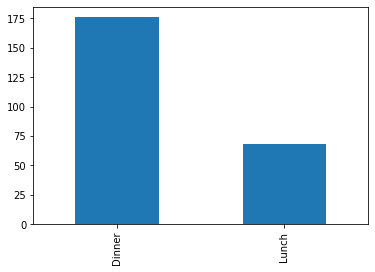

In [15]:
#plot
tips.time.value_counts().plot(kind='bar')

In [16]:
#proportion of dinner and lunch

In [18]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [19]:
#when do people pay more tips lunch or dinner?

In [22]:
tips.groupby('time')['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

In [23]:
#mean value of tip at dinner time > lunch time.

<AxesSubplot:xlabel='time'>

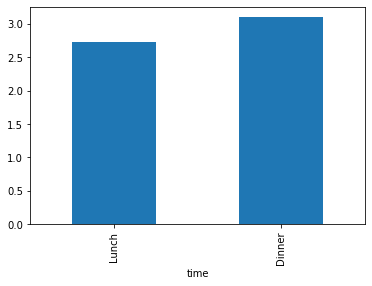

In [26]:
#plot
tips.groupby('time')['tip'].mean().plot(kind='bar')

In [27]:
tips.groupby('smoker')['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [28]:
#smoker and non-smoker nearly give same tip.

In [29]:
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [30]:
#male give more tips than female.

In [31]:
#cross-table for smoker and tips for average tips.

In [32]:
tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

In [33]:
#making above table more like a pivot structure.

In [34]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


In [35]:
tips.groupby(['smoker','day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,3.030000,2.7140,2.875476,3.516842
No,2.673778,2.8125,3.102889,3.167895


In [36]:
#above table is based on weekdays.

In [37]:
#Now creating new column to calculate % of tips compared to total bill.

In [38]:
tips['tip_percentage']=(tips['tip']/tips['total_bill'])*100

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

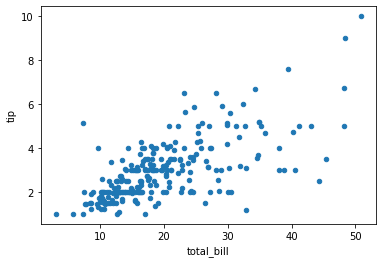

In [40]:
tips.plot.scatter(x='total_bill',y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

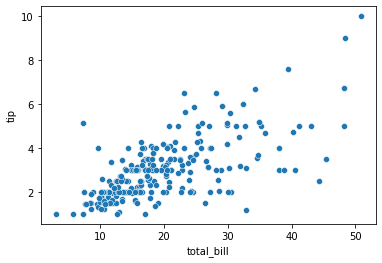

In [41]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

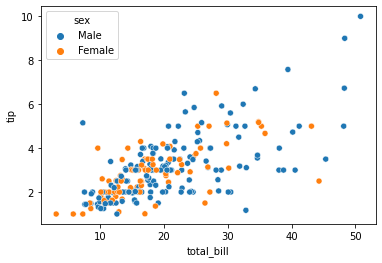

In [42]:
#adding effect of column sex.
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

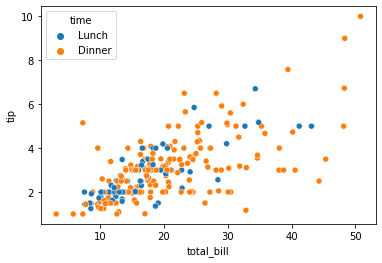

In [43]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='time')

In [45]:
#creating the bifurcation of time based on column sex.

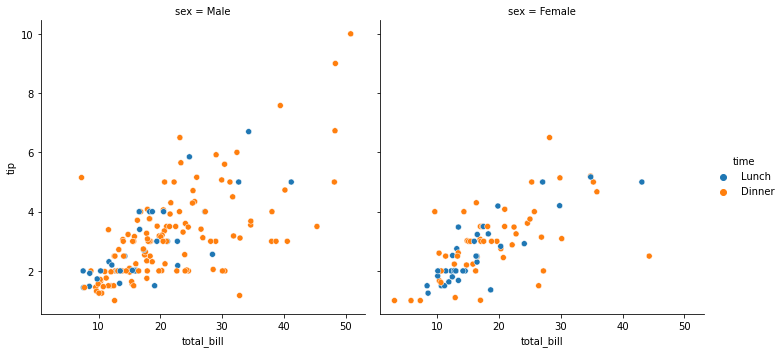

In [46]:
sns.relplot(x='total_bill',y='tip',data=tips,col='sex',hue='time')

In [47]:
#distribution of total_bill by time.

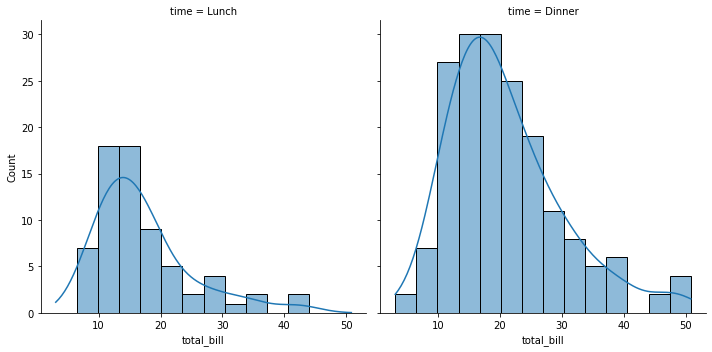

In [49]:
sns.displot(data=tips ,x='total_bill',col='time',kde=True)

In [50]:
#clearly people pay more total bill during dinner.

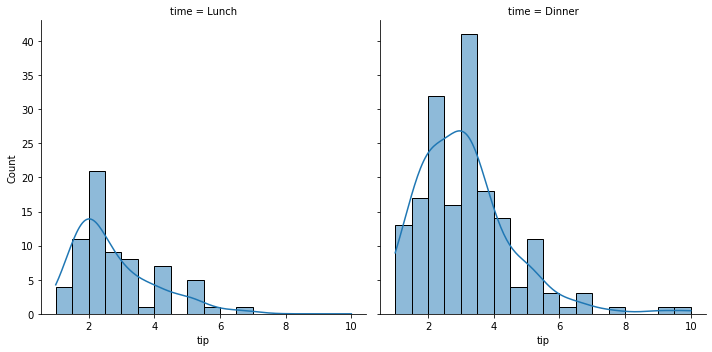

In [51]:
#tip distribution plot
sns.displot(data=tips,x='tip',col='time',kde=True)

In [52]:
#creating correlation and distribution of all the numeric variables by sex.

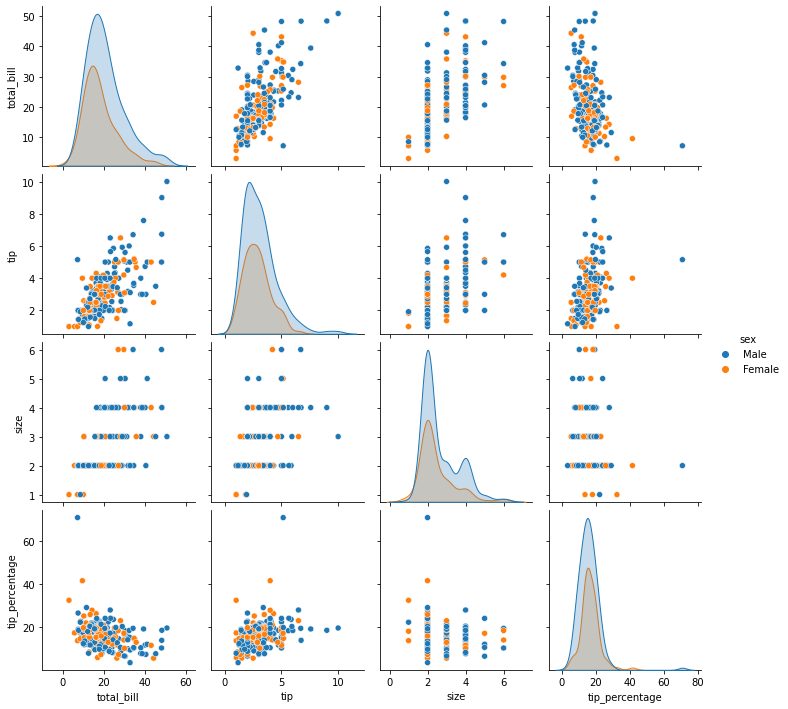

In [53]:
sns.pairplot(data=tips,hue='sex')

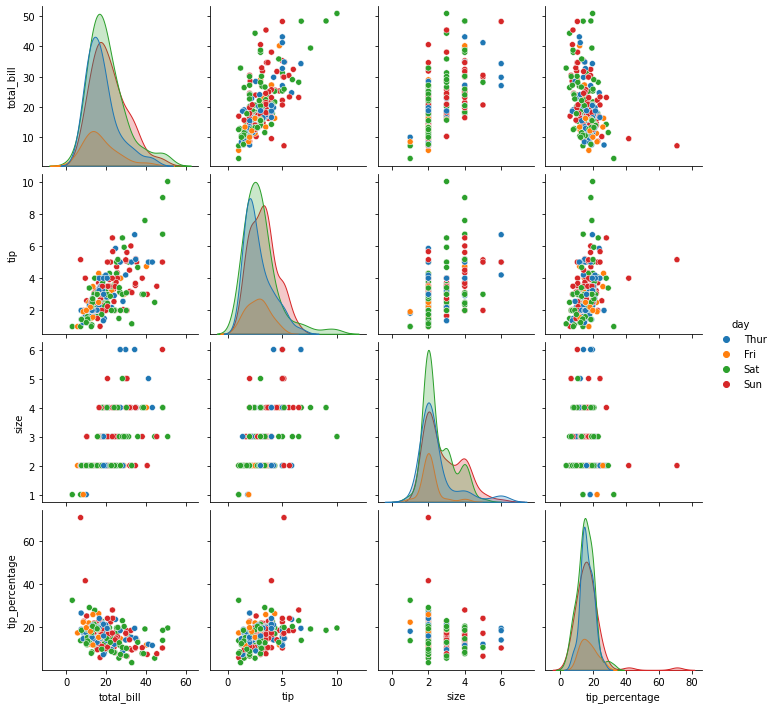

In [55]:
sns.pairplot(data=tips,hue='day')

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


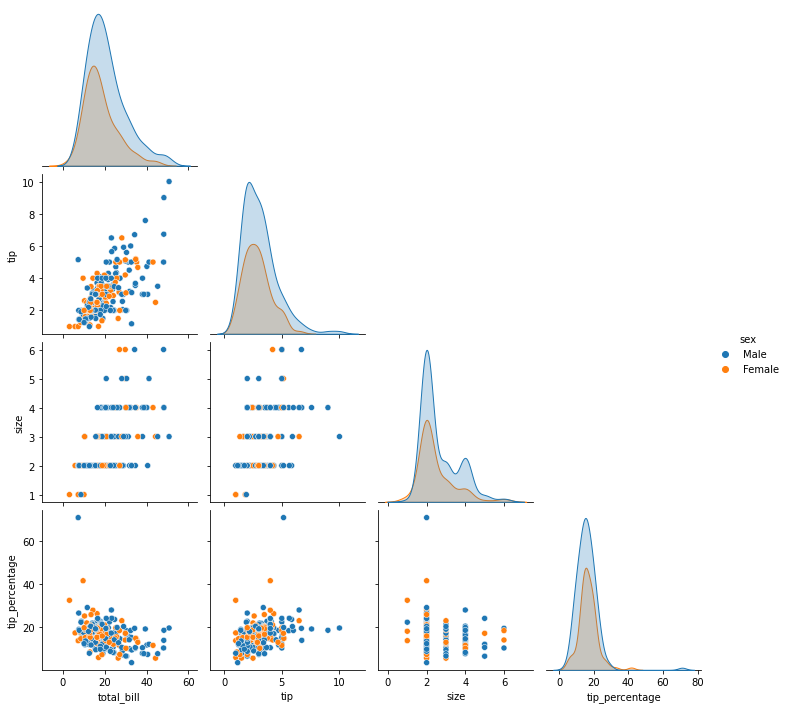

In [59]:
sns.pairplot(tips,hue='sex',corner=True)

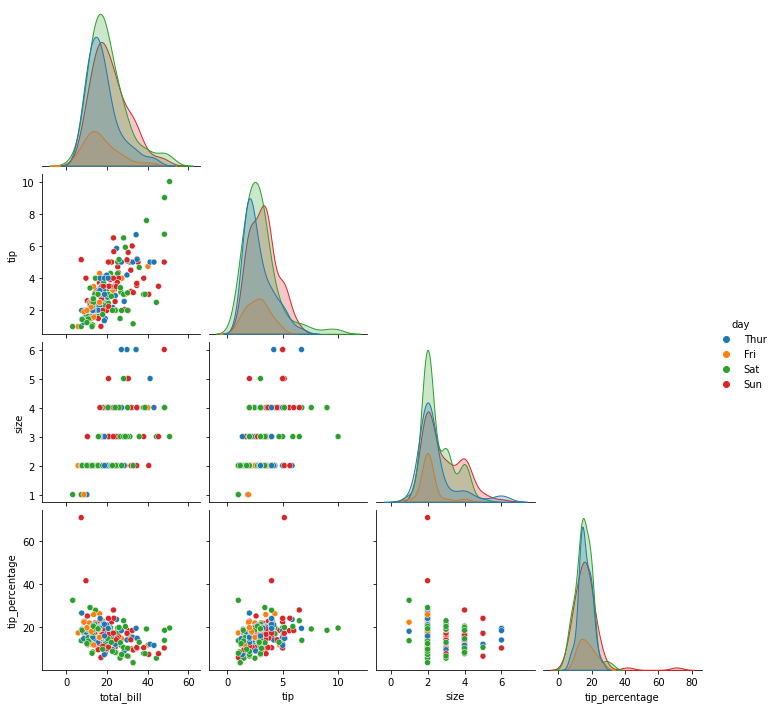

In [60]:
sns.pairplot(tips,hue='day',corner=True)

In [62]:
#sns.pairplot(tips,hue='sex',corner=True) makes each graph or plot exactly once unlike 
#that originally made by pairplot where corner=True was not written.

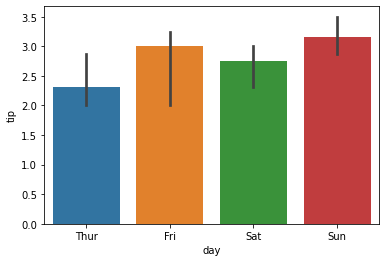

In [72]:
from numpy import median   #used median as a measure of central tendency.
ax=sns.barplot(x="day",y="tip",data=tips,estimator=median)

In [68]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


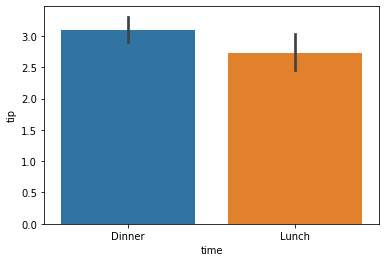

In [73]:
ax=sns.barplot(x="time",y="tip",data=tips,order=["Dinner","Lunch"])

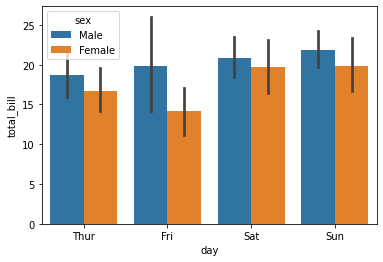

In [74]:
ax=sns.barplot(x="day",y="total_bill",hue="sex",data=tips)

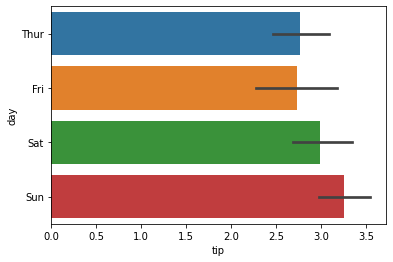

In [75]:
#horizontal bars
ax=sns.barplot(x="tip",y="day",data=tips)

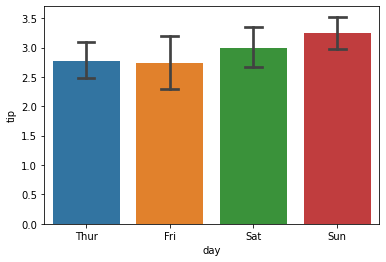

In [77]:
ax=sns.barplot(x="day",y="tip",data=tips,capsize=0.2)

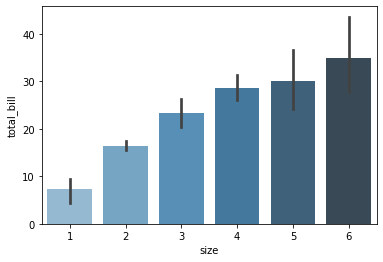

In [78]:
#using different colour palettes for bars.
ax=sns.barplot(x="size",y="total_bill",data=tips,palette="Blues_d")

In [79]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [80]:
tips['total_bill'].median()

17.795

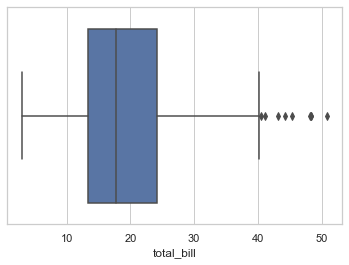

In [81]:
#boxplot
sns.set_theme(style="whitegrid")
tips=sns.load_dataset('tips')
ax=sns.boxplot(x=tips['total_bill'])

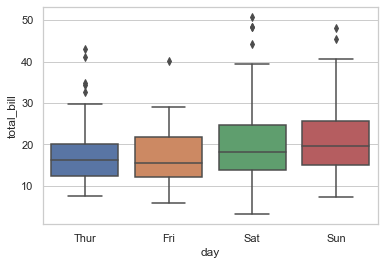

In [82]:
ax=sns.boxplot(x="day",y="total_bill",data=tips)

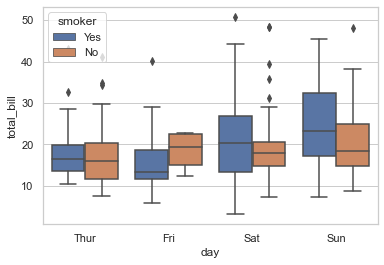

In [83]:
ax=sns.boxplot(x="day",y="total_bill",hue="smoker",data=tips)

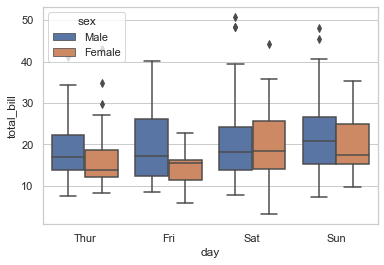

In [84]:
ax=sns.boxplot(x="day",y="total_bill",hue="sex",data=tips)

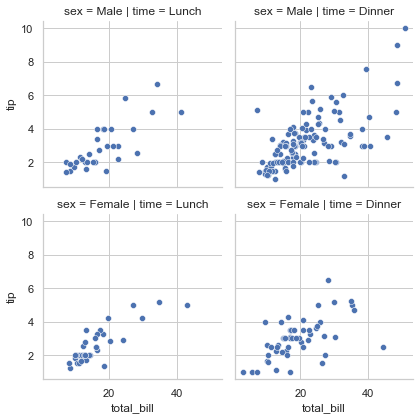

In [85]:
g=sns.FacetGrid(tips,col="time",row="sex")
g.map(sns.scatterplot,"total_bill","tip")

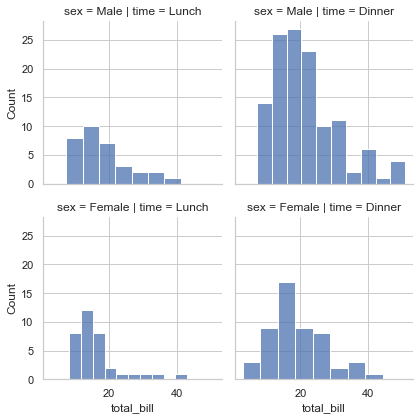

In [88]:
g=sns.FacetGrid(tips,col="time",row="sex")
g.map_dataframe(sns.histplot,x="total_bill")

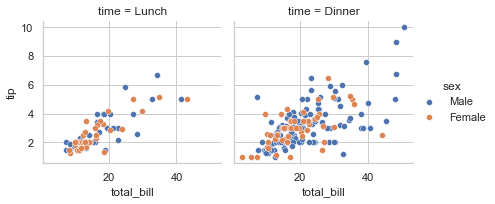

In [92]:
g=sns.FacetGrid(tips,col="time",hue="sex")
g.map_dataframe(sns.scatterplot,x="total_bill",y="tip")
g.add_legend()

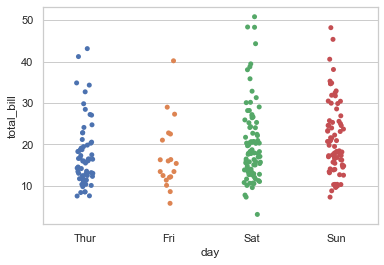

In [93]:
ax=sns.stripplot(x="day",y="total_bill",data=tips)

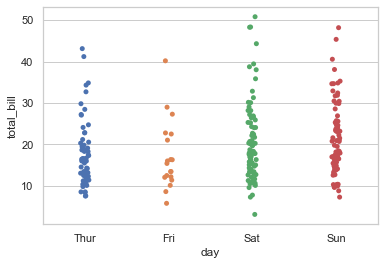

In [94]:
ax=sns.stripplot(x="day",y="total_bill",data=tips,jitter=0.05)

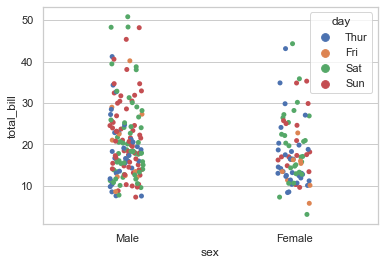

In [95]:
ax=sns.stripplot(x="sex",y="total_bill",hue="day",data=tips)

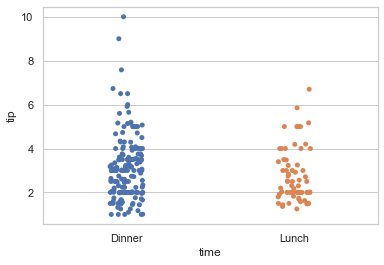

In [96]:
ax=sns.stripplot(x="time",y="tip",data=tips,order=["Dinner","Lunch"])

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

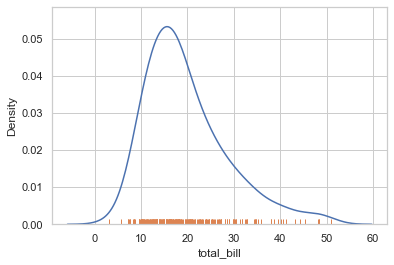

In [97]:
sns.kdeplot(data=tips,x="total_bill")
sns.rugplot(data=tips,x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

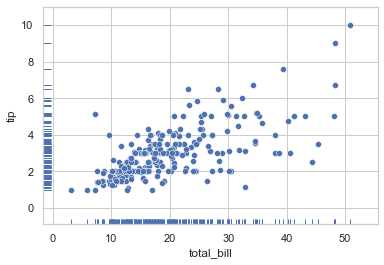

In [98]:
sns.scatterplot(data=tips,x="total_bill",y="tip")
sns.rugplot(data=tips,x="total_bill",y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

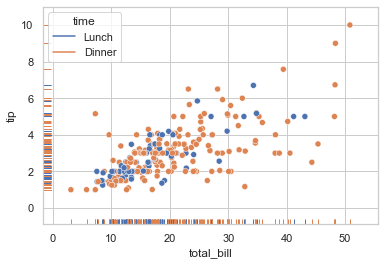

In [99]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="time")
sns.rugplot(data=tips,x="total_bill",y="tip",hue="time")

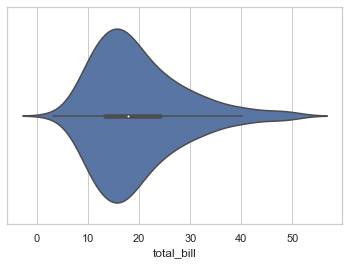

In [100]:
ax=sns.violinplot(x=tips["total_bill"])

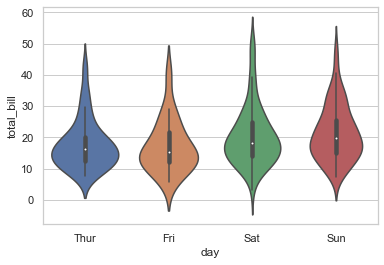

In [101]:
ax=sns.violinplot(x="day",y="total_bill",data=tips)

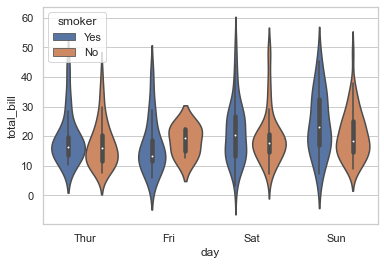

In [102]:
ax=sns.violinplot(x="day",y="total_bill",hue="smoker",data=tips)

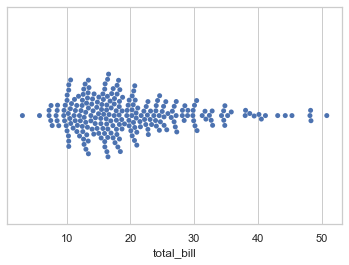

In [103]:
ax=sns.swarmplot(x=tips["total_bill"])

In [104]:
#unlike in stripplot , in the swarmplot values don't overlap.Hence density of points is clearly visible.

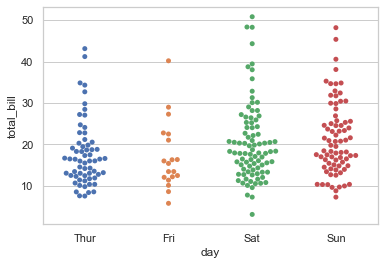

In [105]:
ax=sns.swarmplot(x="day",y="total_bill",data=tips)

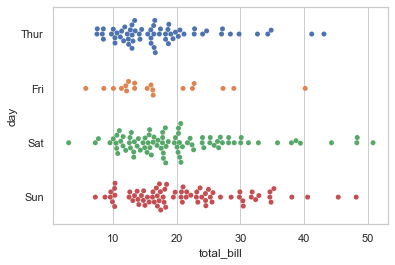

In [106]:
ax=sns.swarmplot(y="day",x="total_bill",data=tips)

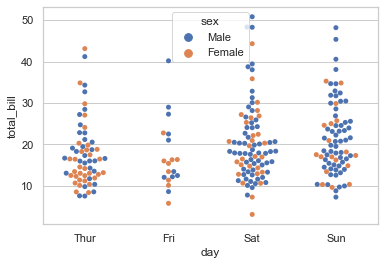

In [107]:
ax=sns.swarmplot(x="day",y="total_bill",hue="sex",data=tips)